In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for visualization 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls","../input"]).decode("utf8"))

combats.csv
pokemon.csv
tests.csv



In [2]:
data = pd.read_csv('../input/pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [4]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


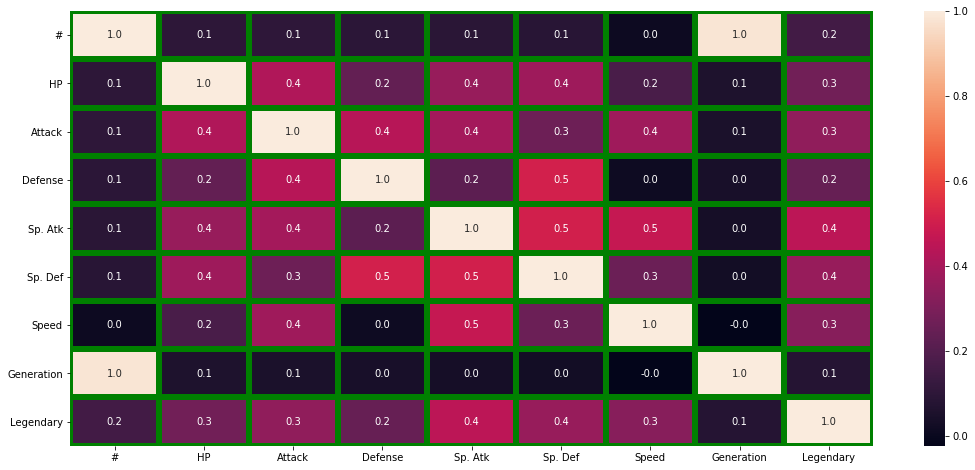

In [5]:
# Correlation map
f,ax = plt.subplots(figsize = (18,8))
sns.heatmap(data.corr(),annot = True,linewidths = 5, fmt = '.1f',linecolor  = 'green' , ax = ax)
plt.show()

In [6]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

> 1. INTRODUCTION TO PYTHON¶


MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.
1. Line plot is better when x axis is time.
2. Scatter is better when there is correlation between two variables
3. .Histogram is better when we need to see distribution of numerical data.
4. Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle



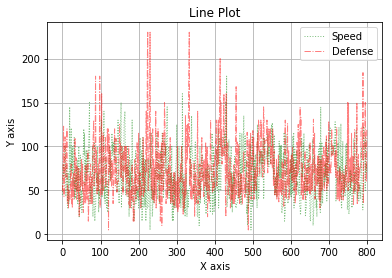

In [7]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'Line',color = 'green',label = 'Speed',linewidth = 1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth = 1,alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc = 'upper right') # legend puts label into plot
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.show()


Text(0.5, 1.0, 'Attack Defense Scatter Plot')

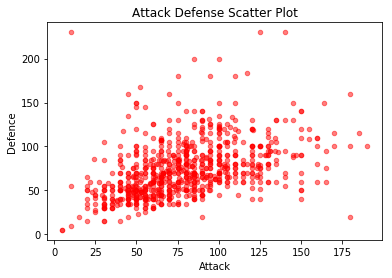

In [8]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')

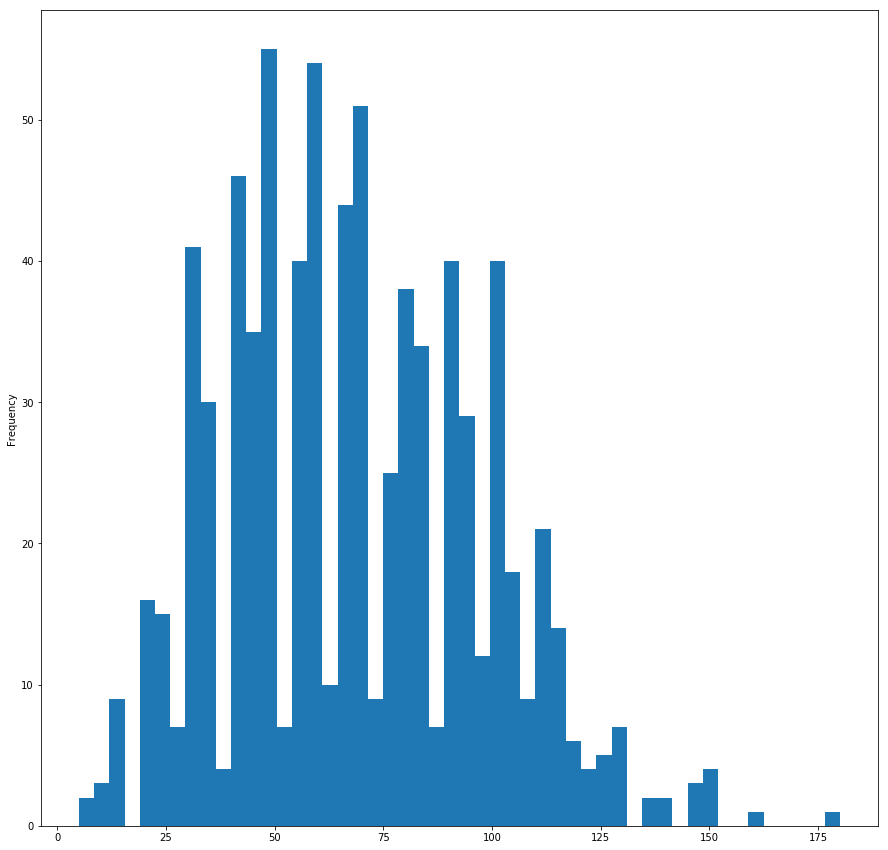

In [9]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (15,15))
plt.show()

In [10]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

DICTIONARY¶
Why we need dictionary?

It has 'key' and 'value'
Faster than lists 
What is key and value. Example:
dictionary = {'spain' : 'madrid'}
Key is spain.
Values is madrid. 

It's that easy. 
Lets practice some other properties like keys(), values(), update, add, check, remove key, remove all entries and remove dicrionary.

In [11]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [12]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [13]:
# In order to run all code you need to take comment this line
# del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

{}


PANDAS
What we need to know about pandas?

CSV: comma - separated values

In [14]:
Series = data['Defense']
print(type(Series))
data_frame = data[['Defense']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Before continue with pandas, we need to learn logic, control flow and filtering. 
Comparison operator: ==, <, >, <= 
Boolean operators: and, or ,not 
Filtering pandas

In [15]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [16]:
# 1 Filtering pandas Data Frame
x= data['Defense']>200 ## There are only three pokemon who have higher defense than 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [17]:
#2 Filtering pandas with logical and
# There are only two pokemon who have defense greater than 200 and attack greater than 100
 data[(data['Defense']>200) & (data['Attack']>100)]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


WHILE and FOR LOOPS¶
We will learn most basic while and for loops

In [18]:
# Stay in loop if condition (i is not equal 5 )is true
i = 0
while i != 5:
    print ('i is : ',i)
    i += 1
print(i , 'is equal to 5')

i is :  0
i is :  1
i is :  2
i is :  3
i is :  4
5 is equal to 5


In [19]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [20]:
# Stay in loop if condition (i is not equal to 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is :' ,i)
print('')

## Enumerate index and value of list 
# index  : value  = 0:1,1:2,2:3,3:4
for index ,value in enumerate(lis):
    print(index,": ",value)
print('')

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index , value in data[['Attack']][0:2].iterrows():
    print(index,";",value)

i is : 1
i is : 2
i is : 3
i is : 4
i is : 5

0 :  1
1 :  2
2 :  3
3 :  4
4 :  5

spain  :  madrid
france  :  paris

0 ; Attack    49
Name: 0, dtype: int64
1 ; Attack    62
Name: 1, dtype: int64


1. In this part, you learn:

* how to import csv file
* plotting line,scatter and histogram
* basic dictionary features
* basic pandas features like filtering that is actually something always used and main for being data scientist
* While and for loops

2. PYTHON DATA SCIENCE TOOLBOX


USER DEFINED FUNCTION
What we need to know about functions:
 docstrings: documentation for functions. Example: 
for f(): 
"""This is docstring for documentation of function f"""

tuble: sequence of immutable python objects. 
cant modify values 
tuble uses paranthesis like tuble = (1,2,3) 
unpack tuble into several variables like a,b,c = tuble

In [21]:
# example of what we learn above
def tuble_ex():
    """ return defined t tube"""
    t = (1,2,3)
    return t
a ,b,c = tuble_ex()
print(a,b,c)

1 2 3


SCOPE¶
What we need to know about scope:

global: defined main body in script
local: defined in a function
built in scope: names in predefined built in scope module such as print, len 

Lets make some basic examples

In [22]:
# guess print what
x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

2
3


In [23]:
# What if there is no local scope
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x
# First local scopesearched, then global scope searched, if two of them cannot be found lastly built in scope searched

10


In [24]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

NESTED FUNCTION¶
* function inside function.
* There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [25]:
#Nested function
def square():
    """return square of value"""
    def add():
        """add two local variable"""
        x =2 
        y = 3
        z = x+y
        return z
    return add()**2

print(square())
        

25


DEFAULT and FLEXIBLE ARGUMENTS¶
Default argument example: 
* def f(a, b=1):
  """ b = 1 is default argument"""
* Flexible argument example: 
* def f(*args):
 """ *args can be one or more"""

* def f(** kwargs)
 """ **kwargs is a dictionary"""


lets write some code to practice

In [26]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(3))
# what if we want to change default arguments
print(f(5,4,3))

6
12


In [27]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(3)
print("")
f(1,2,3,4)

# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """print key and value of dictionary"""
    for key,value in kwargs.items():
        print(key ,":",value)
f(country = 'spain',capital = 'madrid',population = 123456)



3

1
2
3
4
country : spain
capital : madrid
population : 123456



LAMBDA FUNCTION
Faster way of writing function

In [28]:
square = lambda x: x**2 # where x is the name of argument
print(square(4))
tot = lambda x,y,z : x+y+z
print(tot(2,3,5))

16
10


ANONYMOUS FUNCTİON
* Like lambda function but it can take more than one arguments.
* 
* map(func,seq) : applies a function to all the items in a list

In [29]:
number_list = [1,2,3]
y = map(lambda x : x**2,number_list)
print(list(y))

[1, 4, 9]



ITERATORS
* iterable is an object that can return an iterator
* iterable: an object with an associated iter() method 
* example: list, strings and dictionaries
* iterator: produces next value with next() method

In [30]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

r
o n a l d o


zip(): zip lists

In [31]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
list3 = [9,10,11,12]
z = zip(list1,list2,list3)
print(z)
z_list = list(z)
print(z_list)

[(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]


In [32]:
un_zip = zip(*z_list)
print(un_zip)
un_list1,un_list2,un_list3 = list(un_zip) # unzip returns tuble
print(un_list1)
print(un_list2)
print(un_list3)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
(9, 10, 11, 12)
<class 'tuple'>


LIST COMPREHENSİON¶
* One of the most important topic of this kernel 
* We use list comprehension for data analysis often. 
* list comprehension: collapse for loops for building lists into a single line 
* Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is unnecessarily long. We can make it one line code that is list comprehension.

In [33]:
num1 = [1,2,3]
num2 = [i +1 for i in num1]
print(num2)

[2, 3, 4]


* [i + 1 for i in num1 ]: list of comprehension 
* i +1: list comprehension syntax 
* for i in num1: for loop syntax 
* i: iterator 
* num1: iterable object

In [34]:
# Conditionals on iterable
num1 = [5,10,15,6]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20, 1]


In [35]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ['high' if i > threshold else 'low' for i in data.Speed]
data.loc[:10,['speed_level','Speed']]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


Up to now, you learn

* User defined function
* Scope
* Nested function
* Default and flexible arguments
* Lambda function
* Anonymous function
* Iterators
* List comprehension

**3. Cleaning Data**

DIAGNOSE DATA for CLEANING¶

We need to diagnose and clean data before exploring. 
Unclean data:

* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

We will use head, tail, columns, shape and info methods to diagnose data

In [36]:
data = pd.read_csv('../input/pokemon.csv')
data.head()  # head shows first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [37]:
# tail shows last 5 rows
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [38]:
# columns gives column names of features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [39]:
# shape gives number of rows and columns in a tuble
data.shape

(800, 12)

In [40]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB



EXPLORATORY DATA ANALYSIS

value_counts(): Frequency counts 
outliers: the value that is considerably higher or lower from rest of the data

* Lets say value at 75% is Q3 and value at 25% is Q1.
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR 
* We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in middle of the sequence. In this case it would be 11.
* 
* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* 
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [41]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna = False ))
# if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [42]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


VISUAL EXPLORATORY DATA ANALYSIS¶
* Box plots: visualize basic statistics like outliers, min/max or quantiles

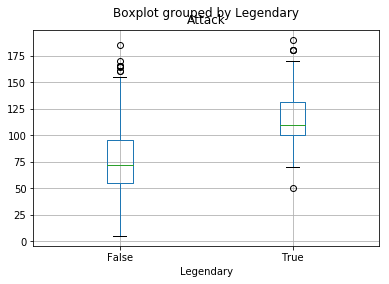

In [43]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

TIDY DATA¶
* We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it.

In [44]:
# Firstly I create new data from pokemons data to explain melt nore easily.
data_new = data.head()    # I only take 5 rows into new data
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [45]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43



PIVOTING DATA
Reverse of melting.

In [46]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


CONCATENATING DATA
We can concatenate two dataframe

In [47]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis = 0,ignore_index = True)
# axis = 0 : adds dataframes in row 
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [48]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column i.e joining done by column 
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


DATA TYPES¶

There are 5 basic data types: object(string),booleab, integer, float and categorical. 
* We can make conversion data types like from str to categorical or from int to float 
* Why is category important:
* 
* make dataframe smaller in memory
* can be utilized for anlaysis especially for sklearn(we will learn later)

In [49]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [50]:
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [51]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [52]:
# As you can see Type 1 is converted from object to categorical
# And Speed ,s converted from int to float
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

MISSING DATA and TESTING WITH ASSERT¶

If we encounter with missing data, what we can do:

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean 
* Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [53]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [54]:
# Lets check Type 2
data["Type 2"].value_counts(dropna = False)
# As you can see , there are 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ghost        14
Ice          14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [55]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?
data1["Type 2"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Poison
1      Poison
2      Poison
3      Poison
6      Flying
7      Dragon
8      Flying
15     Flying
16     Poison
17     Poison
18     Poison
19     Poison
20     Flying
21     Flying
22     Flying
23     Flying
26     Flying
27     Flying
36     Ground
39     Ground
44      Fairy
45      Fairy
46     Flying
47     Flying
48     Poison
49     Poison
50     Poison
51      Grass
52      Grass
53     Poison
        ...  
761    Dragon
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
771    Flying
772     Fairy
773     Fairy
777     Fairy
778     Grass
779     Grass
780     Grass
781     Grass
782     Grass
783     Grass
784     Grass
785     Grass
786     Grass
787     Grass
790    Dragon
791    Dragon
793    Flying
794    Ground
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 414, dtype: object>

In [56]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true
# In order to run all code, we need to make this line comment
# assert 1==2 # return error because it is false

In [57]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [58]:
data["Type 2"].fillna('empty',inplace = True)

In [59]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [60]:
data['Type 2'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Poison
1      Poison
2      Poison
3      Poison
6      Flying
7      Dragon
8      Flying
15     Flying
16     Poison
17     Poison
18     Poison
19     Poison
20     Flying
21     Flying
22     Flying
23     Flying
26     Flying
27     Flying
36     Ground
39     Ground
44      Fairy
45      Fairy
46     Flying
47     Flying
48     Poison
49     Poison
50     Poison
51      Grass
52      Grass
53     Poison
        ...  
761    Dragon
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
771    Flying
772     Fairy
773     Fairy
777     Fairy
778     Grass
779     Grass
780     Grass
781     Grass
782     Grass
783     Grass
784     Grass
785     Grass
786     Grass
787     Grass
790    Dragon
791    Dragon
793    Flying
794    Ground
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 414, dtype: object>

In this part, you learn:

* Diagnose data for cleaning
* Exploratory data analysis
* Visual exploratory data analysis
* Tidy data
* Pivoting data
* Concatenating data
* Data types
* Missing data and testing with assert

4. PANDAS FOUNDATION


REVİEW of PANDAS
As you notice, I do not give all idea in a same time. Although, we learn some basics of pandas, we will go deeper in pandas.

* single column = series
* NaN = not a number
* dataframe.values = numpy


BUILDING DATA FRAMES FROM SCRATCH
* We can build data frames from csv as we did earlier.
* Also we can build dataframe from dictionaries
* zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [61]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
print(zipped)
data_dict = dict(zipped)
print(data_dict)
df = pd.DataFrame(data_dict)
df

[('country', ['Spain', 'France']), ('population', ['11', '12'])]
{'country': ['Spain', 'France'], 'population': ['11', '12']}


,country,population
0,Spain,11
1,France,12


In [62]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [63]:
# Broadcasting
df["income"] = 0 # Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0



VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
 * bins: number of bins
 * range(tuble): min and max values of bins
 * normed(boolean): normalize or not
 * cumulative(boolean): compute cumulative distribution

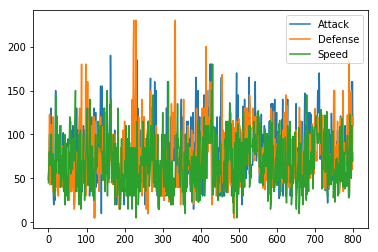

In [64]:
# plotting all data
data1 = data.loc[:,['Attack','Defense','Speed']]
data1.plot()
# it is confusing

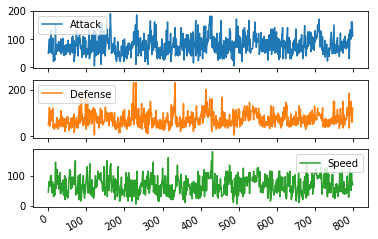

In [65]:
# subplots
data1.plot(subplots = True)
plt.show()

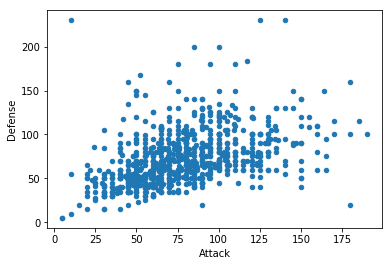

In [66]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


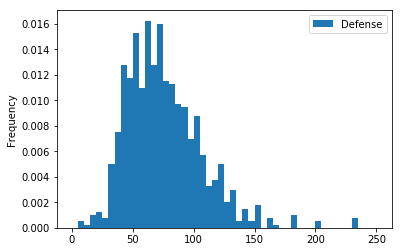

In [67]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

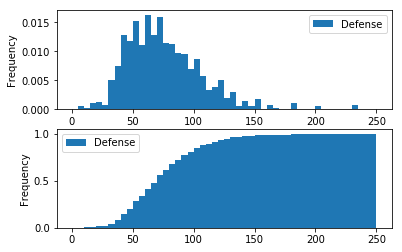

In [68]:
# Histogram subplot with non cummulative and cummulative
fig ,axes = plt.subplots(nrows = 2,ncols = 1)
data1.plot(kind = "hist", y = "Defense",bins = 50,range = (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

STATISTICAL EXPLORATORY DATA ANALYSIS
I already explained it at previous parts. However lets look at one more time.

*     count: number of entries
*     mean: average of entries
*     std: standart deviation
*     min: minimum entry
*     25%: first quantile
*     50%: median or second quantile

*     75%: third quantile
* max: maximum entry

In [69]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000



INDEXING PANDAS TIME SERIES
* datetime = object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [70]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1]))
# As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))


<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [71]:
# Close Warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object= pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make data as index
data2 = data2.set_index("date")
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [72]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1    ...     Speed  Generation  Legendary
date                                   ...                                 
1992-03-10  3       Venusaur  Grass    ...      80.0           1      False
1993-03-15  4  Mega Venusaur  Grass    ...      80.0           1      False
1993-03-16  5     Charmander   Fire    ...      65.0           1      False

[3 rows x 12 columns]


RESAMPLING PANDAS TIME SERIES¶
* Resampling: statistical method over different time intervals
* Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

In [73]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [74]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False
1992-04-30,3.083333,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN
1992-05-31,3.166667,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN
1992-06-30,3.250000,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN
1992-07-31,3.333333,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN
1992-08-31,3.416667,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN
1992-09-30,3.500000,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN


In [76]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


MANIPULATING DATA FRAMES WITH PANDAS¶



INDEXING DATA FRAMES

* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [77]:
# read data
data = pd.read_csv('../input/pokemon.csv')
data = data.set_index('#')
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [78]:
# indexing using square brackets
data["HP"][1]

45

In [79]:
# using column attribute and row label
data.HP[1]

45

In [80]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [81]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
6,58,64
7,78,84
8,78,130
9,78,104



SLICING DATA FRAME
* Difference between selecting columns
* Series and data frames
* Slicing and indexing series
* Reverse slicing
* From something to end

In [82]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [83]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [84]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"]

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [85]:
# From something to end
data.loc[1:10,"Speed":]

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False



FILTERING DATA FRAMES

Creating boolean series Combining filters Filtering column based others

In [86]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [87]:
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [88]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [89]:
# Filtering column based others
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64


TRANSFORMING DATA

* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns

In [90]:
# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [91]:
# Or we can use lambda function
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [92]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


INDEX OBJECTS AND LABELED DATA¶

index: sequence of label

In [93]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [94]:
# Overwrite index
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,900,1)
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [95]:
# We can make one of the column as index. I actually did it at the beginning of manipulating data frames with pandas section
# It was like this
# data= data.set_index("#")
# also you can use 
# data.index = data["#"]

HIERARCHICAL INDEXING¶

Setting indexing

In [96]:
# lets read data frame one more time to start from beginning
data = pd.read_csv('../input/pokemon.csv')
data.head()
# As you can see there is index. However we want to set one or more column to be index

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [97]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

#              Name    ...      Generation  Legendary
Type 1   Type 2                            ...                           
Grass    Poison     1         Bulbasaur    ...               1      False
         Poison     2           Ivysaur    ...               1      False
         Poison     3          Venusaur    ...               1      False
         Poison     4     Mega Venusaur    ...               1      False
Fire     NaN        5        Charmander    ...               1      False
         NaN        6        Charmeleon    ...               1      False
         Flying     7         Charizard    ...               1      False
         Dragon     8  Mega Charizard X    ...               1      False
         Flying     9  Mega Charizard Y    ...               1      False
Water    NaN       10          Squirtle    ...               1      False
         NaN       11         Wartortle    ...               1      False
         NaN       12         Blastoise    ...               1      False
         NaN       13    Mega Blastoise    ...               1      False
Bug      NaN       14          Caterpie    ...               1      False
         NaN       15           Metapod    ...               1      False
         Flying    16        Butterfree    ...               1      False
         Poison    17            Weedle    ...               1      False
         Poison    18            Kakuna    ...               1      False
         Poison    19          Beedrill    ...               1      False
         Poison    20     Mega Beedrill    ...               1      False
Normal   Flying    21            Pidgey    ...               1      False
         Flying    22         Pidgeotto    ...               1      False
         Flying    23           Pidgeot    ...               1      False
         Flying    24      Mega Pidgeot    ...               1      False
         NaN       25           Rattata    ...               1      False
         NaN       26          Raticate    ...               1      False
         Flying    27           Spearow    ...               1      False
         Flying    28            Fearow    ...               1      False
Poison   NaN       29             Ekans    ...               1      False
         NaN       30             Arbok    ...               1      False
...               ...               ...    ...             ...        ...
Psychic  NaN       71          Alakazam    ...               1      False
         NaN       72     Mega Alakazam    ...               1      False
Fighting NaN       73            Machop    ...               1      False
         NaN       74           Machoke    ...               1      False
         NaN       75           Machamp    ...               1      False
Grass    Poison    76        Bellsprout    ...               1      False
         Poison    77        Weepinbell    ...               1      False
         Poison    78        Victreebel    ...               1      False
Water    Poison    79         Tentacool    ...               1      False
         Poison    80        Tentacruel    ...               1      False
Rock     Ground    81           Geodude    ...               1      False
         Ground    82          Graveler    ...               1      False
         Ground    83             Golem    ...               1      False
Fire     NaN       84            Ponyta    ...               1      False
         NaN       85          Rapidash    ...               1      False
Water    Psychic   86          Slowpoke    ...               1      False
         Psychic   87           Slowbro    ...               1      False
         Psychic   88      Mega Slowbro    ...               1      False
Electric Steel     89         Magnemite    ...               1      False
         Steel     90          Magneton    ...               1      False
Normal   Flying    91        Farfetch'd    ...               1      False
         Flying    92   

PIVOTING DATA FRAMES¶

pivoting: reshape tool

In [98]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [99]:
# pivoting
df.pivot(index="treatment",columns = "gender",values="response")

gender,F,M
treatment,,
A,10,45
B,5,9



STACKING and UNSTACKING DATAFRAME
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [100]:
df1 = df.set_index(["treatment","gender"])
df1
# lets unstack it

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [101]:
# level determines indexes
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [102]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [103]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65



MELTING DATA FRAMES

Reverse of pivoting

In [104]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


CATEGORICALS AND GROUPBY

In [105]:
# according to treatment take means of other features
df.groupby("treatment").mean()   # mean is aggregation / reduction method
# there are other methods like sum, std,max or min

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [106]:
# we can only choose one of the feature
df.groupby("treatment").age.max() 

treatment
A    15
B    72
Name: age, dtype: int64

In [107]:
# Or we can choose multiple features
df.groupby("treatment")[["age","response"]].min() 

,age,response
treatment,,
A,4,10
B,65,5


In [108]:
df.info()
# as you can see gender is object
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
#df["gender"] = df["gender"].astype("category")
#df["treatment"] = df["treatment"].astype("category")
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
treatment    4 non-null object
gender       4 non-null object
response     4 non-null int64
age          4 non-null int64
dtypes: int64(2), object(2)
memory usage: 208.0+ bytes
